In [1]:
import os.path

import geopandas as gpd
from matplotlib import pyplot as plt
import numpy as np

from fault_mesh.faults.leapfrog import LeapfrogMultiFault
from fault_mesh.faults.connected import ConnectedFaultSystem
from fault_mesh.utilities.graph import connected_nodes

#read in faults
# note D90 is the seismogenic thickness, whereas Dfc is the theoretical maximum rupture depth (see p. 30 of the CFM report)
# warnings about expected fields because of changes in naming conventions of CFM - should be fine
script_dir=os.path.abspath(".")
data = LeapfrogMultiFault.from_nz_cfm_shp("Z:\Penney\leapfrog_cfm\kaikoura_faults\cfm_cut.gpkg", remove_colons=True,
                                        exclude_zero=False, depth_type="Dfc", exclude_aus=False)

# suggest faults to combine (these need editing in csv)
data.find_connections()
major_faults = connected_nodes(data.neighbour_connections)
data.suggest_fault_systems(out_prefix=os.path.join(script_dir,"faults_in_windows","kaikoura"))
#read in edited faults
data.read_fault_systems(fault_system_csv=os.path.join(script_dir,"faults_in_windows","kaikoura_suggested_faults_edited_cfm_v3.csv"))

data.generate_curated_faults()

data.suggest_cutting_hierarchy(os.path.join(script_dir,"faults_in_windows","kaikoura"))

data.read_cutting_hierarchy(os.path.join(script_dir,"faults_in_windows","kaikoura_hierarchy151222.csv"))

Connection: Acheron and Clarence Central
Connection: Acheron and Elliott
Connection: Akatarawa and Moonshine
Connection: Akatarawa and Otaki Forks 1
Connection: Akatarawa and Wellington Hutt Valley 4
Connection: Akatarawa and Wellington Hutt Valley 5
Connection: Alpine Jacksons to Kaniere and Alpine Kaniere to Springs Junction
Connection: Alpine Jacksons to Kaniere and Kelly
Connection: Alpine Kaniere to Springs Junction and Alpine Jacksons to Kaniere
Connection: Alpine Kaniere to Springs Junction and Alpine Springs Junction to Tophouse
Connection: Alpine Kaniere to Springs Junction and Awatere Southwest
Connection: Alpine Kaniere to Springs Junction and Fowlers
Connection: Alpine Kaniere to Springs Junction and Hope Taramakau
Connection: Alpine Kaniere to Springs Junction and Kelly
Connection: Alpine Springs Junction to Tophouse and Alpine Kaniere to Springs Junction
Connection: Alpine Springs Junction to Tophouse and Awatere Southwest
Connection: Alpine Springs Junction to Tophouse a

In [2]:
for dir_name in ["shps", "traces", "end_lines", "footprints"]:
    if not os.path.exists(os.path.join(script_dir,"faults_in_windows",dir_name)):
        os.mkdir(os.path.join(script_dir,"faults_in_windows",dir_name))


Wellington Hutt Valley combined
connected
Alpine combined
connected
Awatere Vernon combined
connected
Clarence combined
connected
Dry River - Huangarua combined


NotImplementedError: Sub-geometries may have coordinate sequences, but multi-part geometries do not

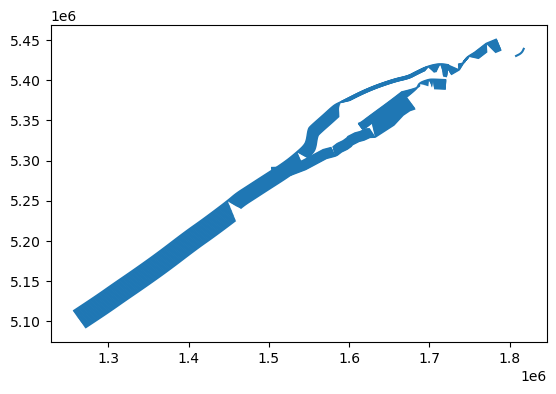

In [3]:
plt.close("all")
fig, ax = plt.subplots()
for fault in data.curated_faults:
    print(fault.name)
    fault.generate_depth_contours(np.arange(2000, 32000., 2000.))


    fault.contours.to_file(os.path.join(script_dir,"faults_in_windows",f"shps/{fault.name}_contours.shp"))
    trace = gpd.GeoSeries(fault.smoothed_trace)
    trace.plot(ax=ax)
    fault.contours.plot(ax=ax)

    gpd.GeoSeries(fault.smoothed_trace).to_file(os.path.join(script_dir,"faults_in_windows",f"traces/{fault.name}_trace.shp"))
    if isinstance(fault, ConnectedFaultSystem):
        print("connected")
        gpd.GeoSeries(fault.end_lines(smoothed=True)).to_file(os.path.join(script_dir,"faults_in_windows",f"end_lines/{fault.name}_end_lines.shp"))

In [6]:
fault.contours

,depth,geometry
0,-2000.0,MULTILINESTRING Z ((1813470.779 5434532.880 -2...
1,-4000.0,MULTILINESTRING Z ((1812401.753 5434855.000 -4...
2,-6000.0,MULTILINESTRING Z ((1811372.021 5435264.200 -6...
3,-8000.0,MULTILINESTRING Z ((1810386.683 5435743.428 -8...
4,-10000.0,MULTILINESTRING Z ((1809396.321 5436253.718 -1...
5,-12000.0,MULTILINESTRING Z ((1808436.203 5436806.779 -1...
6,-14000.0,MULTILINESTRING Z ((1807339.470 5437302.426 -1...
7,-16000.0,MULTILINESTRING Z ((1806242.738 5437798.072 -1...
8,-18000.0,MULTILINESTRING Z ((1805146.005 5438293.719 -1...
9,-20000.0,MULTILINESTRING Z ((1804049.272 5438789.365 -2...


In [ ]:
[geom for geom in fault.contours.geometry]

In [ ]:
[geom.coords for geom in fault.contours.geometry[0]]
